In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def init_graph(n):
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.randint(0, 2) == 1:
                matrix[i][j] = matrix[j][i] = np.random.randint(0, 100)
    return matrix

In [4]:
def draw_graph(grapth):
  plt.figure(figsize=(12, 8))
  pos = nx.spring_layout(grapth, seed=7)
  nx.draw_networkx_nodes(grapth, pos)
  nx.draw_networkx_edges(grapth, pos)
  edge_labels = nx.get_edge_attributes(grapth, "weight")
  nx.draw_networkx_edge_labels(grapth, pos, edge_labels)
  plt.show()

In [5]:
def get_nearest_node(matrix, visited_nodes):
  result = [-1,-1]
  min_d = 1000000
  for node in visited_nodes:
    for i in range(len(matrix[node])):
      if matrix[node][i] == 0:
        continue
      if matrix[node][i] < min_d:
        min_d = matrix[node][i]
        result = [node,i]
     
  for node in visited_nodes:
    matrix[node][result[1]] = matrix[result[1]][node] = 0
  return result, min_d

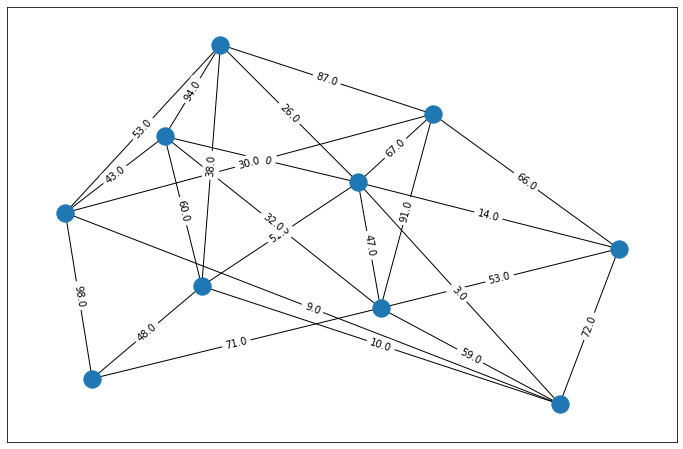

In [6]:
n = 10
init_matrix = init_graph(n)
matrix = np.copy(init_matrix)
G = nx.from_numpy_matrix(matrix)
draw_graph(G)

[0, 4] 10.0
[4, 7] 3.0
[4, 8] 9.0
[7, 2] 14.0
[7, 1] 26.0
[8, 6] 30.0
[7, 5] 42.0
[5, 9] 32.0
[0, 3] 48.0
[-1, -1] 1000000


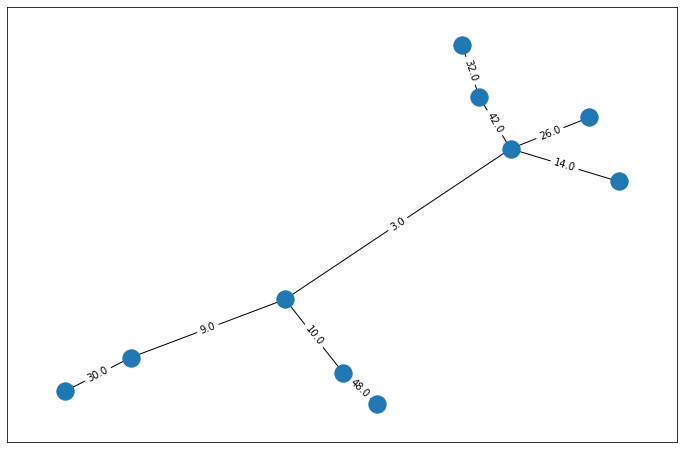

In [7]:
min_tree = nx.Graph()
visited_nodes = [0]
unvisited_nodes = np.arange(start=0, stop=10, step=1).tolist()

while len(unvisited_nodes) != 0:
  nearest_node, min_d = get_nearest_node(matrix, visited_nodes)
  print(nearest_node, min_d)
  if nearest_node[0] == -1:
    break
  new_node = nearest_node[1]
  visited_nodes.append(new_node)
  unvisited_nodes.remove(new_node)

  min_tree.add_edge(*nearest_node, weight=min_d)

draw_graph(min_tree)

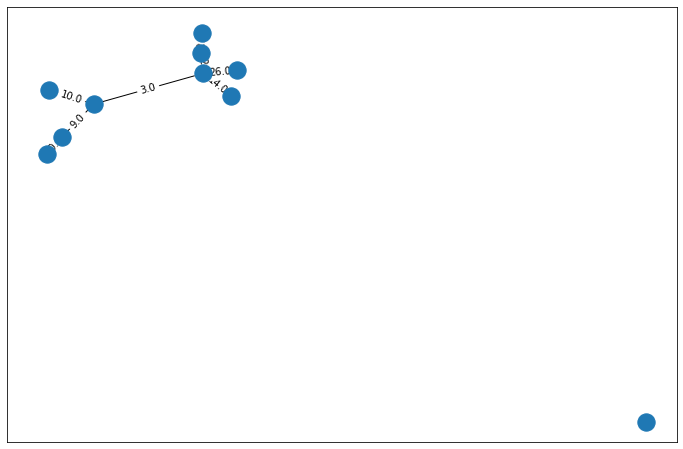

In [8]:
max_node= [-1, -1]
max_d = -1

nodes_list = list(min_tree.edges.data())

for i in nodes_list:
  if i[2]["weight"] > max_d:
      max_d = i[2]["weight"]
      max_node = i   

min_tree.remove_edge(*max_node[:2])
draw_graph(min_tree)
     